In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
DATA_DIR = 'D:/Data/index/'

In [44]:
df = pd.read_excel('%s/881001.WI.xlsx'%(DATA_DIR))

In [45]:
df = df[df.index >= '2005-01-01']

In [50]:
df.tail()

,close
2018-01-08,4654.6714
2018-01-09,4668.9445
2018-01-10,4664.7907
2018-01-11,4673.6481
2018-01-12,4672.9302


In [49]:
df.shape

(3168, 1)

In [47]:
files = os.listdir(DATA_DIR)
files = [f for f in files if f.startswith('CI')]

In [60]:
dic = {}
for f in files:
    temp = pd.read_excel('%s/%s'%(DATA_DIR, f))
    temp = temp[temp.index >= '2005-01-01']
    dic[f.rstrip('.xlsx')] = temp['close']
cdf = pd.DataFrame(dic)
#     dic[f.rstrip('.xlsx')] = temp['close'].pct_change().rolling(window=243).corr(df['close'].pct_change().rolling(window=243))

In [61]:
cor_df = pd.DataFrame(columns=cdf.columns)
for col in cdf.columns:
    cor_df[col] = cdf[col].pct_change().rolling(window=121).corr(df['close'].pct_change().rolling(window=121))

In [62]:
cor_df.dropna().tail()

,CI005001.WI,CI005002.WI,CI005003.WI,CI005004.WI,CI005005.WI,CI005006.WI,CI005007.WI,CI005008.WI,CI005009.WI,CI005010.WI,...,CI005020.WI,CI005021.WI,CI005022.WI,CI005023.WI,CI005024.WI,CI005025.WI,CI005026.WI,CI005027.WI,CI005028.WI,CI005029.WI
2018-01-08,0.611164,0.505722,0.615218,0.847012,0.605379,0.887066,0.746514,0.770146,0.864653,0.880328,...,0.765772,0.137964,0.552000,0.580988,0.773738,0.854589,0.806659,0.810026,0.791575,0.795021
2018-01-09,0.607005,0.504090,0.614603,0.844219,0.602305,0.884503,0.743746,0.768052,0.861968,0.879103,...,0.771661,0.139161,0.553444,0.581265,0.774728,0.854665,0.807384,0.809250,0.791088,0.792583
2018-01-10,0.579666,0.519576,0.614369,0.815472,0.594582,0.863777,0.702542,0.731520,0.836897,0.855597,...,0.727117,0.205960,0.568488,0.535297,0.747483,0.841925,0.784153,0.771299,0.751579,0.756854
2018-01-11,0.575329,0.513953,0.612604,0.814495,0.589570,0.864681,0.718350,0.714206,0.837021,0.855093,...,0.726568,0.213635,0.572077,0.532385,0.745996,0.842126,0.784714,0.757570,0.748008,0.757667
2018-01-12,0.565633,0.486904,0.591563,0.805809,0.572355,0.857044,0.707589,0.698858,0.833677,0.852025,...,0.725435,0.197958,0.545155,0.527994,0.738403,0.835018,0.782691,0.765150,0.748109,0.746898


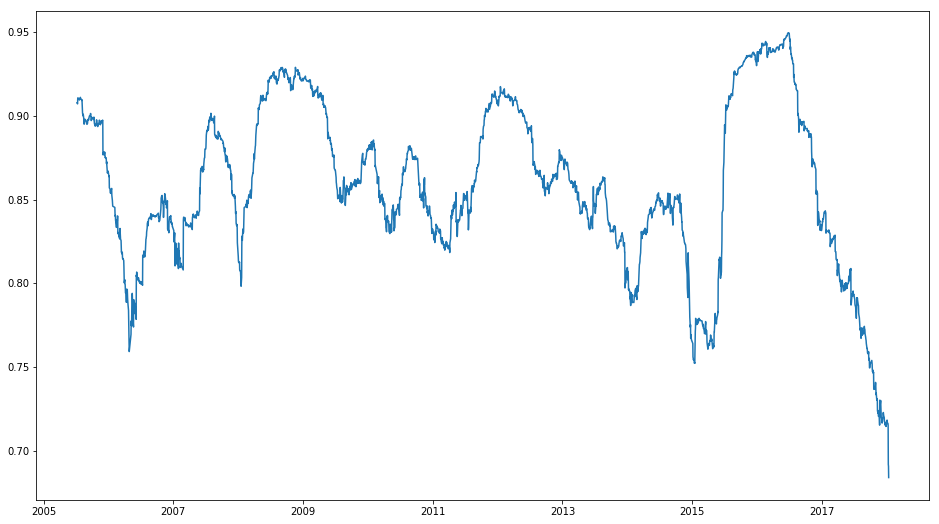

In [69]:
plt.figure(figsize=(16, 9))
plt.plot(cor_df.mean(axis=1))
# (1 + df['close'].pct_change()).cumprod().plot()

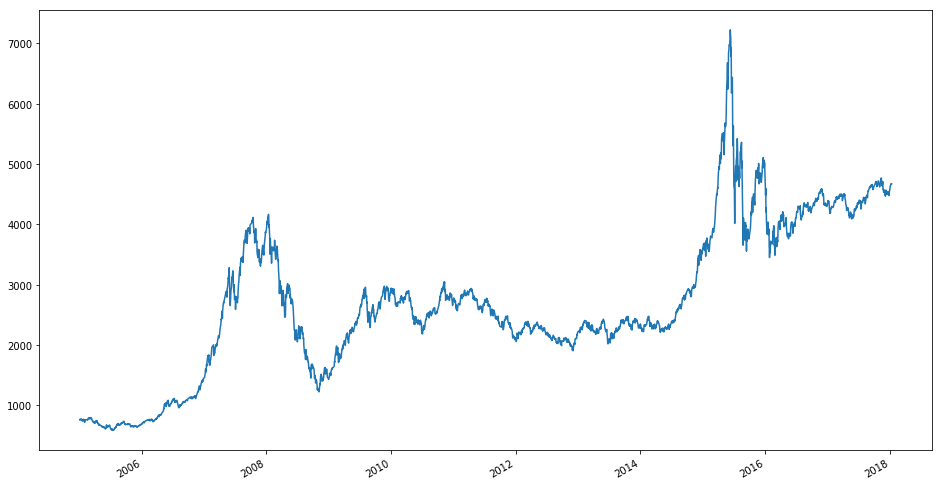

In [67]:
plt.figure(figsize=(16, 9))
df['close'].plot()